# **I. Demonstrations**

In [45]:
%%writefile OpenMP_Hello.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

int main (int argc, char *argv[])
{
    /* Uncomment the code below to manually set the number of threads */
    //omp_set_dynamic(0);
    //omp_set_num_threads(5);

    int nthreads, tid;

    #pragma omp parallel private(nthreads, tid)
    {
        tid = omp_get_thread_num();
        printf("Hello World from thread = %d\n", tid);

        if (tid == 0)
        {
            nthreads = omp_get_num_threads();
            printf("Number of threads = %d\n", nthreads);
        }
    }

    return 0;
}

Overwriting OpenMP_Hello.c


In [46]:
!gcc OpenMP_Hello.c -o Hello.exe -lm -fopenmp

In [47]:
!./Hello.exe

Hello World from thread = 1
Hello World from thread = 0
Number of threads = 2


In [48]:
%%writefile OpenMP_Hello.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

int main (int argc, char *argv[])
{
    /* Uncomment the code below to manually set the number of threads */
    omp_set_dynamic(0);
    omp_set_num_threads(5);

    int nthreads, tid;

    #pragma omp parallel private(nthreads, tid)
    {
        tid = omp_get_thread_num();
        printf("Hello World from thread = %d\n", tid);

        if (tid == 0)
        {
            nthreads = omp_get_num_threads();
            printf("Number of threads = %d\n", nthreads);
        }
    }

    return 0;
}

Overwriting OpenMP_Hello.c


In [49]:
!gcc OpenMP_Hello.c -o Hello.exe -lm -fopenmp

In [50]:
!./Hello.exe

Hello World from thread = 4
Hello World from thread = 0
Number of threads = 5
Hello World from thread = 2
Hello World from thread = 1
Hello World from thread = 3


In [7]:
%%writefile OpenMP_OutMes.cpp

#include <omp.h>
#include <iostream>
#include <stdio.h>

int main(int argc, char ** argv)
{
    int tid;

    // C++ cout always bad
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();
        std::cout << "cout " << tid << " hello world" << std::endl;
    }

    // printf sometimes bad, depends on implementation
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();
        printf("printf %d hello world\n", tid);
    }

    // correct way
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();

        // force printfs to execute in sequential way
        #pragma omp critical
        {
            printf("critical %d hello world\n", tid);
            /// try to use cout instead printf here
            // std::cout << "cout " << tid << " hello world" << std::endl;
        }
    }

    return 0;
}


Overwriting OpenMP_OutMes.cpp


In [8]:
!g++ OpenMP_OutMes.cpp -o OutMes.exe -lm -fopenmp

In [9]:
!./OutMes.exe

cout 1 hello world
cout 0 hello world
printf 1 hello world
printf 0 hello world
critical 1 hello world
critical 0 hello world


In [10]:
%%writefile OpenMP_OutMes.cpp

#include <omp.h>
#include <iostream>
#include <stdio.h>

int main(int argc, char ** argv)
{
    int tid;

    // C++ cout always bad
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();
        std::cout << "cout " << tid << " hello world" << std::endl;
    }

    // printf sometimes bad, depends on implementation
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();
        printf("printf %d hello world\n", tid);
    }

    // correct way
    #pragma omp parallel private(tid)
    {
        tid = omp_get_thread_num();

        // force printfs to execute in sequential way
        #pragma omp critical
        {
            //printf("critical %d hello world\n", tid);
            /// try to use cout instead printf here
            std::cout << "cout " << tid << " hello world" << std::endl;
        }
    }

    return 0;
}

Overwriting OpenMP_OutMes.cpp


In [11]:
!g++ OpenMP_OutMes.cpp -o OutMes.exe -lm -fopenmp

In [12]:
!./OutMes.exe

cout cout 10 hello world hello world

printf 1 hello world
printf 0 hello world
cout 1 hello world
cout 0 hello world


In [13]:
%%writefile OpenMP_PrivateShared.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>
#include <malloc.h>

/* compile with gcc -o PrivateShared -fopenmp PrivateShared.c */

int main(int argc, char** argv)
{
    int i = 0;
    int tid;
    int size = 20;

    int * a = (int *)calloc(size, sizeof(int));
    int * b = (int *)calloc(size, sizeof(int));
    int * c;
    int * tids = (int *)calloc(size, sizeof(int));

    printf("BEFORE\n");

    for (i = 0; i < size; ++i)
    {
        a[i] = b[i] = i;

        printf("a[%d] = %d, b[%d] = %d\n", i, a[i], i, b[i]);
    }

    #pragma omp parallel shared(a, b, tids) private(c, i, tid)
    {
        tid = omp_get_thread_num();

        c = (int *)malloc(sizeof(int));

        #pragma omp for
        for (i = 0; i < size; ++i)
        {
            c[0] = tid * a[i];
            a[i] = c[0];
            b[i] += c[0];
            tids[i] = tid;
        }

        free(c);
    }

    printf("AFTER\n");

    for (i = 0; i < size; ++i)
    {
        printf("tid = %d, a[%d] = %d, b[%d] = %d\n", tids[i], i, a[i], i, b[i]);
    }

    free(a);
    free(b);
    free(tids);

    return 0;
}

Overwriting OpenMP_PrivateShared.c


In [14]:
!gcc OpenMP_PrivateShared.c -o PrivateShared.exe -lm -fopenmp

In [15]:
!./PrivateShared.exe

BEFORE
a[0] = 0, b[0] = 0
a[1] = 1, b[1] = 1
a[2] = 2, b[2] = 2
a[3] = 3, b[3] = 3
a[4] = 4, b[4] = 4
a[5] = 5, b[5] = 5
a[6] = 6, b[6] = 6
a[7] = 7, b[7] = 7
a[8] = 8, b[8] = 8
a[9] = 9, b[9] = 9
a[10] = 10, b[10] = 10
a[11] = 11, b[11] = 11
a[12] = 12, b[12] = 12
a[13] = 13, b[13] = 13
a[14] = 14, b[14] = 14
a[15] = 15, b[15] = 15
a[16] = 16, b[16] = 16
a[17] = 17, b[17] = 17
a[18] = 18, b[18] = 18
a[19] = 19, b[19] = 19
AFTER
tid = 0, a[0] = 0, b[0] = 0
tid = 0, a[1] = 0, b[1] = 1
tid = 0, a[2] = 0, b[2] = 2
tid = 0, a[3] = 0, b[3] = 3
tid = 0, a[4] = 0, b[4] = 4
tid = 0, a[5] = 0, b[5] = 5
tid = 0, a[6] = 0, b[6] = 6
tid = 0, a[7] = 0, b[7] = 7
tid = 0, a[8] = 0, b[8] = 8
tid = 0, a[9] = 0, b[9] = 9
tid = 1, a[10] = 10, b[10] = 20
tid = 1, a[11] = 11, b[11] = 22
tid = 1, a[12] = 12, b[12] = 24
tid = 1, a[13] = 13, b[13] = 26
tid = 1, a[14] = 14, b[14] = 28
tid = 1, a[15] = 15, b[15] = 30
tid = 1, a[16] = 16, b[16] = 32
tid = 1, a[17] = 17, b[17] = 34
tid = 1, a[18] = 18, b[18] = 36

Commands **#pragma omp parallel shared(a, b, tids) private(c, i, tid)** and **#pragma omp for** allow to achiev parallel execution of the loop iterations with each thread having its own private variables (c, i, tid) and accessing shared variables (a, b, tids) safely

In [16]:
%%writefile OpenMP_ParSec.c

#include <omp.h>
#include <stdio.h>

int main(int argc, char *argv[])
{
    const size_t N = 20;

    int i;

    float a[N], b[N], c[N], d[N];

    #pragma omp parallel
    {
        #pragma omp for
        for (i = 0; i < N; ++i)
        {
            a[i] = i;
            b[i] = N - i;
        }
    }

    #pragma omp parallel shared(a,b,c,d) private(i)
    {
        #pragma omp sections nowait
        {
            #pragma omp section
            for (i = 0; i < N; ++i)
            {
                c[i] = a[i] + b[i];
            }

            #pragma omp section
            for (i = 0; i < N; ++i)
            {
                d[i] = a[i] * b[i];
            }
        }
    }

    for (i = 0; i < N; ++i)
    {
        printf("c[%1$d] = %2$f, d[%1$d] = %3$f\n", i, c[i], d[i]);
    }

    return 0;
 }

Overwriting OpenMP_ParSec.c


In [17]:
!gcc OpenMP_ParSec.c -o ParSec.exe -lm -fopenmp

In [18]:
!./ParSec.exe

c[0] = 20.000000, d[0] = 0.000000
c[1] = 20.000000, d[1] = 19.000000
c[2] = 20.000000, d[2] = 36.000000
c[3] = 20.000000, d[3] = 51.000000
c[4] = 20.000000, d[4] = 64.000000
c[5] = 20.000000, d[5] = 75.000000
c[6] = 20.000000, d[6] = 84.000000
c[7] = 20.000000, d[7] = 91.000000
c[8] = 20.000000, d[8] = 96.000000
c[9] = 20.000000, d[9] = 99.000000
c[10] = 20.000000, d[10] = 100.000000
c[11] = 20.000000, d[11] = 99.000000
c[12] = 20.000000, d[12] = 96.000000
c[13] = 20.000000, d[13] = 91.000000
c[14] = 20.000000, d[14] = 84.000000
c[15] = 20.000000, d[15] = 75.000000
c[16] = 20.000000, d[16] = 64.000000
c[17] = 20.000000, d[17] = 51.000000
c[18] = 20.000000, d[18] = 36.000000
c[19] = 20.000000, d[19] = 19.000000


Command **#pragma omp section** directive divides the work into independent sections: one calculates elements of c-array and another - elements od d-array. Each section can be executed concurrently by different threads. Command **#pragma omp sections nowait** allows threads to proceed to execute subsequent code without waiting for other threads to finish their sections

In [19]:
%%writefile OpenMP_SumArray.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char ** argv)
{
    const size_t N = 10000;

    int a[N];

    #pragma omp parallel for
    for (int i = 0; i < N; ++i)
    {
        a[i] = i;
    }

    int sum = 0;

    #pragma omp parallel for reduction(+: sum)
    for (int i = 0; i < N; ++i)
    {
        sum += a[i];
    }

    printf("sum = %d\n", sum);

    return 0;
}

Overwriting OpenMP_SumArray.c


In [20]:
!gcc OpenMP_SumArray.c -o SumArray.exe -lm -fopenmp

In [21]:
!./SumArray.exe

sum = 49995000


# **II. Programs with bugs**

In [22]:
%%writefile OpenMP_BugReduction.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>

float dotprod(float *a, float *b, size_t N)
{
    int tid;
    float sum = 0.0;

    #pragma omp parallel for private(tid) reduction(+:sum)
    for (int i = 0; i < N; ++i)
    {
        tid = omp_get_thread_num();
        sum += a[i] * b[i];
        printf("tid = %d i = %d\n", tid, i);
    }

    return sum;
}

int main(int argc, char *argv[])
{
    const size_t N = 100;
    float sum;
    float a[N], b[N];

    for (size_t i = 0; i < N; ++i)
    {
        a[i] = b[i] = (float)i;
    }

    sum = dotprod(a, b, N);

    printf("Sum = %f\n", sum);

    return 0;
}


Overwriting OpenMP_BugReduction.c


In [23]:
!gcc OpenMP_BugReduction.c -o BugReduction.exe -lm -fopenmp

In [24]:
!./BugReduction.exe

tid = 0 i = 0
tid = 0 i = 1
tid = 0 i = 2
tid = 0 i = 3
tid = 0 i = 4
tid = 0 i = 5
tid = 0 i = 6
tid = 0 i = 7
tid = 0 i = 8
tid = 0 i = 9
tid = 0 i = 10
tid = 0 i = 11
tid = 0 i = 12
tid = 0 i = 13
tid = 0 i = 14
tid = 0 i = 15
tid = 0 i = 16
tid = 0 i = 17
tid = 0 i = 18
tid = 0 i = 19
tid = 0 i = 20
tid = 0 i = 21
tid = 0 i = 22
tid = 0 i = 23
tid = 0 i = 24
tid = 0 i = 25
tid = 0 i = 26
tid = 0 i = 27
tid = 0 i = 28
tid = 0 i = 29
tid = 0 i = 30
tid = 0 i = 31
tid = 0 i = 32
tid = 0 i = 33
tid = 0 i = 34
tid = 0 i = 35
tid = 0 i = 36
tid = 0 i = 37
tid = 0 i = 38
tid = 0 i = 39
tid = 0 i = 40
tid = 0 i = 41
tid = 0 i = 42
tid = 0 i = 43
tid = 0 i = 44
tid = 0 i = 45
tid = 0 i = 46
tid = 0 i = 47
tid = 0 i = 48
tid = 0 i = 49
tid = 1 i = 50
tid = 1 i = 51
tid = 1 i = 52
tid = 1 i = 53
tid = 1 i = 54
tid = 1 i = 55
tid = 1 i = 56
tid = 1 i = 57
tid = 1 i = 58
tid = 1 i = 59
tid = 1 i = 60
tid = 1 i = 61
tid = 1 i = 62
tid = 1 i = 63
tid = 1 i = 64
tid = 1 i = 65
tid = 1 i = 66
tid =

In [25]:
%%writefile OpenMP_BugParFor.c

#include <omp.h>
#include <stdio.h>
#include <stdlib.h>




int main (int argc, char *argv[])
{
    const size_t N = 100;
    const size_t chunk = 3;

    int i, tid;
    float a[N], b[N], c[N];

    for (i = 0; i < N; ++i)
    {
        a[i] = b[i] = (float)i;
    }
    #pragma omp parallel shared(a,b,c,chunk) private(i, tid)
    {

        tid = omp_get_thread_num();
        #pragma omp for schedule(dynamic,chunk) nowait
        for (i = 0; i < N; ++i)
        {
            c[i] = a[i] + b[i];
            printf("tid = %d, c[%d] = %f\n", tid, i, c[i]);
        }
    }

    return 0;
}



Overwriting OpenMP_BugParFor.c


In [26]:
!gcc OpenMP_BugParFor.c -o BugParFor.exe -lm -fopenmp

In [27]:
!./BugParFor.exe

tid = 1, c[0] = 0.000000
tid = 1, c[1] = 2.000000
tid = 1, c[2] = 4.000000
tid = 1, c[3] = 6.000000
tid = 1, c[4] = 8.000000
tid = 1, c[5] = 10.000000
tid = 1, c[6] = 12.000000
tid = 1, c[7] = 14.000000
tid = 1, c[8] = 16.000000
tid = 1, c[9] = 18.000000
tid = 1, c[10] = 20.000000
tid = 1, c[11] = 22.000000
tid = 1, c[12] = 24.000000
tid = 1, c[13] = 26.000000
tid = 1, c[14] = 28.000000
tid = 1, c[15] = 30.000000
tid = 1, c[16] = 32.000000
tid = 1, c[17] = 34.000000
tid = 1, c[18] = 36.000000
tid = 1, c[19] = 38.000000
tid = 1, c[20] = 40.000000
tid = 1, c[21] = 42.000000
tid = 1, c[22] = 44.000000
tid = 1, c[23] = 46.000000
tid = 1, c[24] = 48.000000
tid = 1, c[25] = 50.000000
tid = 1, c[26] = 52.000000
tid = 1, c[27] = 54.000000
tid = 1, c[28] = 56.000000
tid = 1, c[29] = 58.000000
tid = 1, c[30] = 60.000000
tid = 1, c[31] = 62.000000
tid = 1, c[32] = 64.000000
tid = 1, c[33] = 66.000000
tid = 1, c[34] = 68.000000
tid = 1, c[35] = 70.000000
tid = 1, c[36] = 72.000000
tid = 1, c[37] =

# **III. Sequential programs**

In [28]:
%%writefile OpenMP_Pi.c

#include <stdio.h>
#include <omp.h>

int main()
{
    double start, stop;

    const size_t N = 100000;
    double step;

    double x, pi, sum = 0.;

    step = 1. / (double)N;

    start = omp_get_wtime();

    #pragma omp parallel for private(x) reduction(+:sum)
    for (int i = 0; i < N; ++i)
    {
        x = (i + 0.5) * step;
        sum += 4.0 / (1. + x * x);
    }

    pi = step * sum;

    stop = omp_get_wtime();

    printf("pi = %.16f\n", pi);
    printf("total number of threads: %d\n", omp_get_max_threads());
    printf("total time: %f\n", stop - start);

    return 0;
}


Overwriting OpenMP_Pi.c


In [29]:
!gcc OpenMP_Pi.c -o pi.exe -lm -fopenmp

In [30]:
!./pi.exe

pi = 3.1415926535981464
total number of threads: 2
total time: 0.007687


In [16]:
%%writefile Car.cpp

#include <fstream>
#include <iostream>
#include <stdlib.h>
#include <string>
#include <thread>

#include <stdio.h>
#include <omp.h>

#define RGB_COMPONENT_COLOR 255

static const auto THREADS = std::thread::hardware_concurrency();

struct PPMPixel {
  int red;
  int green;
  int blue;
};

typedef struct {
  int x, y, all;
  PPMPixel *data;
} PPMImage;

void readPPM(const char *filename, PPMImage &img){
    std::ifstream file(filename);
    if (file) {
        std::string s;
        int rgb_comp_color;
        file >> s;
        if (s != "P3") {
            std::cout << "error in format" << std::endl;
            exit(9);
        }
        file >> img.x >> img.y;
        file >> rgb_comp_color;
        img.all = img.x * img.y;
        std::cout << s << std::endl;
        std::cout << "x=" << img.x << " y=" << img.y << " all=" << img.all
                  << std::endl;
        img.data = new PPMPixel[img.all];
        for (int i = 0; i < img.all; i++) {
            file >> img.data[i].red >> img.data[i].green >> img.data[i].blue;
        }
    } else {
        std::cout << "the file:" << filename << "was not found" << std::endl;
    }
    file.close();
}



void animatePPM(PPMImage &img){
    // Temporary storage for the last column of pixels
    PPMPixel *temp = new PPMPixel[img.y];
    for (int i = 0; i < img.y; ++i) {
        // Save last column
        temp[i] = img.data[i * img.x + (img.x - 1)];
    }
    #pragma omp parallel for
    // Shifting columns to the right
    for (int i = 0; i < img.y; ++i) {
        for (int j = img.x - 1; j > 0; --j) {
            img.data[i * img.x + j] = img.data[i * img.x + (j - 1)];
        }
    }
    #pragma omp parallel for
    // The last column goes the first column position
    for (int i = 0; i < img.y; ++i) {
        img.data[i * img.x] = temp[i];
    }

    delete[] temp;
}


void writePPM(const char *filename, PPMImage &img) {
    std::ofstream file(filename, std::ofstream::out);
    file << "P3" << std::endl;
    file << img.x << " " << img.y << " " << std::endl;
    file << RGB_COMPONENT_COLOR << std::endl;
    for (int i = 0; i < img.all; i++) {
        file << img.data[i].red << " " << img.data[i].green << " "
             << img.data[i].blue << (((i + 1) % img.x == 0) ? "\n" : " ");
    }
    file.close();
}

int main(int argc, char *argv[]) {
    double start, stop;
    start = omp_get_wtime();
    PPMImage image;
    readPPM("car.ppm", image);
    int nframes = 30;
    for (int frame = 0; frame<nframes; ++frame){
      animatePPM(image);
      std::string filename = "new_car_" + std::to_string(frame) + ".ppm";
      writePPM(filename.c_str(), image); //закомментить и раскомменить - посмотреть изменение времени
    }
    //writePPM("new_car.ppm", image);
    //convert -delay 20 -loop 0 new_car_*.ppm animation.gif
    //system("convert -delay 20 -loop 0 new_car_*.ppm car_animation.gif");
    stop = omp_get_wtime();
    printf("total time with command writePPM(): %f\n ", stop - start);
    return 0;
}




Overwriting Car.cpp


In [17]:
!g++ Car.cpp -o Car.exe -lm -fopenmp

In [18]:
!./Car.exe

P3
x=303 y=166 all=50298
total time with command writePPM(): 0.466985
 

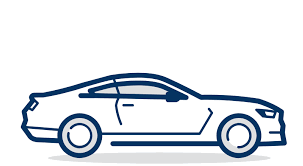

In [19]:
from PIL import Image
img = Image.open('new_car_1.ppm')
img

In [21]:
from PIL import Image

nframes = 30
imgs = []

for i in range(nframes):
    imgs.append(Image.open(f'new_car_{i}.ppm'))

# Save the frames as an animated GIF
imgs[0].save('car_animation.gif',
             save_all=True,
             append_images=imgs[1:],
             duration=100,  # duration between frames in milliseconds
             loop=0)  # loop=0 means the gif will loop forever

In [13]:
%%writefile Car_without_files.cpp

#include <fstream>
#include <iostream>
#include <stdlib.h>
#include <string>
#include <thread>

#include <stdio.h>
#include <omp.h>

#define RGB_COMPONENT_COLOR 255

static const auto THREADS = std::thread::hardware_concurrency();

struct PPMPixel {
  int red;
  int green;
  int blue;
};

typedef struct {
  int x, y, all;
  PPMPixel *data;
} PPMImage;

void readPPM(const char *filename, PPMImage &img){
    std::ifstream file(filename);
    if (file) {
        std::string s;
        int rgb_comp_color;
        file >> s;
        if (s != "P3") {
            std::cout << "error in format" << std::endl;
            exit(9);
        }
        file >> img.x >> img.y;
        file >> rgb_comp_color;
        img.all = img.x * img.y;
        std::cout << s << std::endl;
        std::cout << "x=" << img.x << " y=" << img.y << " all=" << img.all
                  << std::endl;
        img.data = new PPMPixel[img.all];
        for (int i = 0; i < img.all; i++) {
            file >> img.data[i].red >> img.data[i].green >> img.data[i].blue;
        }
    } else {
        std::cout << "the file:" << filename << "was not found" << std::endl;
    }
    file.close();
}



void animatePPM(PPMImage &img){
    // Temporary storage for the last column of pixels
    PPMPixel *temp = new PPMPixel[img.y];
    for (int i = 0; i < img.y; ++i) {
        // Save last column
        temp[i] = img.data[i * img.x + (img.x - 1)];
    }
    #pragma omp parallel for
    // Shifting columns to the right
    for (int i = 0; i < img.y; ++i) {
        for (int j = img.x - 1; j > 0; --j) {
            img.data[i * img.x + j] = img.data[i * img.x + (j - 1)];
        }
    }
    #pragma omp parallel for
    // The last column goes the first column position
    for (int i = 0; i < img.y; ++i) {
        img.data[i * img.x] = temp[i];
    }

    delete[] temp;
}

void writePPM(const char *filename, PPMImage &img) {
    std::ofstream file(filename, std::ofstream::out);
    file << "P3" << std::endl;
    file << img.x << " " << img.y << " " << std::endl;
    file << RGB_COMPONENT_COLOR << std::endl;
    for (int i = 0; i < img.all; i++) {
        file << img.data[i].red << " " << img.data[i].green << " "
             << img.data[i].blue << (((i + 1) % img.x == 0) ? "\n" : " ");
    }
    file.close();
}

int main(int argc, char *argv[]) {
    double start, stop;
    start = omp_get_wtime();
    PPMImage image;
    readPPM("car.ppm", image);
    int nframes = 15;
    for (int frame = 0; frame<nframes; ++frame){
      animatePPM(image);
      std::string filename = "new_car_" + std::to_string(frame) + ".ppm";
    }
    //writePPM("new_car.ppm", image);
    //convert -delay 20 -loop 0 new_car_*.ppm animation.gif
    //system("convert -delay 20 -loop 0 new_car_*.ppm car_animation.gif");
    stop = omp_get_wtime();
    printf("total time without command writePPM(): %f\n ", stop - start);
    return 0;
}

Writing Car_without_files.cpp


In [14]:
!g++ Car_without_files.cpp -o Car_without_files.exe -lm -fopenmp

In [15]:
!./Car_without_files.exe

P3
x=303 y=166 all=50298
total time without command writePPM(): 0.017997
 

# **IV. *Problems with an Asterisk**

In [39]:
%%writefile Axisb.cpp

#include <iostream>
#include <vector>
#include <cmath>
#include <omp.h>

const int ITERATION_LIMIT = 1000;

int main() {
    // Initialize the matrix
    std::vector<std::vector<double>> A = {{10., -1., 2., 0.},
                                          {-1., 11., -1., 3.},
                                          {2., -1., 10., -1.},
                                          {0.0, 3., -1., 8.}};

    // Initialize the RHS vector
    std::vector<double> b = {6., 25., -11., 15.};

    // Print the system
    std::cout << "System:" << std::endl;
    for (size_t i = 0; i < A.size(); ++i) {
        std::cout << A[i][0] << "*x1";
        for (size_t j = 1; j < A[i].size(); ++j) {
            std::cout << " + " << A[i][j] << "*x" << j + 1;
        }
        std::cout << " = " << b[i] << std::endl;
    }
    std::cout << std::endl;

    std::vector<double> x(b.size(), 0.0);

    double start_time = omp_get_wtime(); // Start timing



    for (int it_count = 0; it_count < ITERATION_LIMIT; ++it_count) {

        std::vector<double> x_new(x.size(), 0.0);
        bool converged = true;

        #pragma omp parallel for shared(x, x_new, A, b) reduction(&&:converged)
        for (size_t i = 0; i < A.size(); ++i) {

            double s1 = 0.0, s2 = 0.0;
            for (size_t j = 0; j < i; ++j) {
                s1 += A[i][j] * x[j];
            }
            for (size_t j = i + 1; j < A[i].size(); ++j) {
                s2 += A[i][j] * x[j];
            }
            x_new[i] = (b[i] - s1 - s2) / A[i][i];

            // Check for convergence
            if (std::abs(x_new[i] - x[i]) > 1e-10) {
                converged = false;
            }
        }

        if (converged) {
            break;
        }

        x = x_new;
    }
    double end_time = omp_get_wtime(); // End timing

    std::cout << "Solution: " << std::endl;
    for (size_t i = 0; i < x.size(); ++i) {
        std::cout << x[i] << " ";
    }
    std::cout << std::endl;

    std::cout << "Error:" << std::endl;
    for (size_t i = 0; i < A.size(); ++i) {
        double error = 0.0;
        for (size_t j = 0; j < A[i].size(); ++j) {
            error += A[i][j] * x[j];
        }
        error -= b[i];
        std::cout << error << " ";
    }
    std::cout << std::endl;

    // Print elapsed time
    std::cout << "total time: " << end_time - start_time << " seconds" << std::endl;

    return 0;
}


Writing Axisb.cpp


In [40]:
!g++ Axisb.cpp -o Axisb.exe -lm -fopenmp

In [41]:
!./Axisb.exe

System:
10*x1 + -1*x2 + 2*x3 + 0*x4 = 6
-1*x1 + 11*x2 + -1*x3 + 3*x4 = 25
2*x1 + -1*x2 + 10*x3 + -1*x4 = -11
0*x1 + 3*x2 + -1*x3 + 8*x4 = 15

Solution: 
1 2 -1 1 
Error:
3.95795e-10 -7.29656e-10 5.13317e-10 -5.86034e-10 
total time: 0.000140978 seconds


In [42]:
%%writefile LeastSquares.cpp

#include <iostream>
#include <vector>
#include <cmath>
#include <omp.h>

const int N = 1000;
const double alpha = 0.001;

// Function f(x,a,b)
double f(double x, double a, double b) {
    return a * x + b;
}

// Compute the sum of squared residuals
/*double computeResidualSum(const std::vector<double>& x, const std::vector<double>& y, double a, double b) {
    double sum = 0.0;
    #pragma omp parallel for reduction(+:sum)
    for (size_t i = 0; i < x.size(); ++i) {
        double residual = y[i] - f(x[i], a, b);
        sum += residual * residual;
    }
    return sum;
}*/

// Gradient descent to optimize parameters a and b
void gradientDescent(const std::vector<double>& x, const std::vector<double>& y, double& a, double& b) {
    for (int iter = 0; iter < N; ++iter) {
        double gradient_a = 0.0;
        double gradient_b = 0.0;

        #pragma omp parallel for reduction(+:gradient_a, gradient_b)
        for (size_t i = 0; i < x.size(); ++i) {
            double residual = y[i] - f(x[i], a, b);
            gradient_a += -2.0 * x[i] * residual;
            gradient_b += -2.0 * residual;
        }

        a -= alpha * gradient_a;
        b -= alpha * gradient_b;
    }
}

int main() {

    std::vector<double> x = {1.0, 2.0, 3.0, 4.0, 5.0};
    std::vector<double> y;

    double a = 2.0; // True parameter value for 'a'
    double b = 3.0; // True parameter value for 'b'

    for (double xi : x) {
        y.push_back(a * xi + b + ((double)rand() / RAND_MAX - 0.5)); // Add noise
    }

    // Initial guess for parameters a and b
    double initial_a = 1.0;
    double initial_b = 1.0;

    double start_time = omp_get_wtime(); // Start timing

    // Perform gradient descent to find optimal parameters
    gradientDescent(x, y, initial_a, initial_b);

    double end_time = omp_get_wtime(); // End timing

    // Output the optimized parameters
    std::cout << "Optimized parameters:" << std::endl;
    std::cout << "a = " << initial_a << std::endl;
    std::cout << "b = " << initial_b << std::endl;

    // Print elapsed time
    std::cout << "total time: " << end_time - start_time << " seconds" << std::endl;

    return 0;
}


Overwriting LeastSquares.cpp


In [43]:
!g++  LeastSquares.cpp -o LeastSquares.exe -lm -fopenmp

In [44]:
!./LeastSquares.exe

Optimized parameters:
a = 2.13947
b = 2.7754
total time: 0.000854246 seconds
